<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Load-Filename" data-toc-modified-id="1.-Load-Filename-1">1. Load Filename</a></span></li><li><span><a href="#2.-Check-redundant-data" data-toc-modified-id="2.-Check-redundant-data-2">2. Check redundant data</a></span></li><li><span><a href="#3.-REMOVE-redundant-neg.-data-in-190814-negative" data-toc-modified-id="3.-REMOVE-redundant-neg.-data-in-190814-negative-3">3. REMOVE redundant neg. data in <em>190814 negative</em></a></span></li><li><span><a href="#4.-Find-difficult-set-not-redundant-with-coreset" data-toc-modified-id="4.-Find-difficult-set-not-redundant-with-coreset-4">4. Find difficult set not redundant with coreset</a></span></li><li><span><a href="#5.-Preprocess-difficult-data-and-save-it-into-the-folder,-sm_diff" data-toc-modified-id="5.-Preprocess-difficult-data-and-save-it-into-the-folder,-sm_diff-5">5. Preprocess difficult data and save it into the folder, <em>sm_diff</em></a></span></li><li><span><a href="#6.-Check-the-preprocessing-is-working-well" data-toc-modified-id="6.-Check-the-preprocessing-is-working-well-6">6. Check the preprocessing is working well</a></span></li><li><span><a href="#7.-Go-for-it" data-toc-modified-id="7.-Go-for-it-7">7. Go for it</a></span></li></ul></div>

In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

# 1. Load Filename

In [2]:
def load_filename(phase, cls, les = None, data = 'sm', data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed'):
    """
    phase = 'train', 'test'
    cls: [les]  
      'n': ['neg']
      'h': ['redspot', 'angio', 'active'], 
      'd': ['ero', 'ulc', 'str'],
      'p': ['amp', 'lym', 'tum']}
    """
    lesions = dict(neg = 'negative', 
                   redspot = 'red_spot', angio = 'angioectasia', active = 'active_bleeding', 
                   ero = 'erosion', ulcer = 'ulcer', str = 'stricture', 
                   amp = 'ampulla_of_vater', lym = 'lymphoid_follicles', tum = 'small_bowel_tumor')
    classes = dict(n = 'negative', h = 'hemorrhagic', d = 'depressed', p = 'protruded')

    path = os.path.join(data_dir, data, phase, classes[cls], lesions[les])
    pathlist = glob.glob(path + '/*.jpg')
    name = []
    for path in pathlist:
        name.append(os.path.basename(path))
    
    return np.asarray(name)

neg_h_core_filename = load_filename('total', 'n', 'neg', data = 'sm_core/nh')
neg_d_core_filename = load_filename('total', 'n', 'neg', data = 'sm_core/nd')
redspot_core_filename = load_filename('total', 'h', 'redspot', data = 'sm_core/nh')
angio_core_filename = load_filename('total', 'h', 'angio', data = 'sm_core/nh')
active_core_filename = load_filename('total', 'h', 'active', data = 'sm_core/nh')
ero_core_filename = load_filename('total', 'd', 'ero', data = 'sm_core/nd')
ulcer_core_filename = load_filename('total', 'd', 'ulcer', data = 'sm_core/nd')
str_core_filename = load_filename('total', 'd', 'str', data = 'sm_core/nd')

In [3]:
data_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled'

neg_1_filename = load_filename('p3_2', 'n', 'neg', data = '190520 p3_2', data_dir = data_dir)
redspot_filename = load_filename('p3_2', 'h', 'redspot', data = '190520 p3_2', data_dir = data_dir)
angio_filename = load_filename('p3_2', 'h', 'angio', data = '190520 p3_2', data_dir = data_dir)
active_filename = load_filename('p3_2', 'h', 'active', data = '190520 p3_2', data_dir = data_dir)
ero_filename = load_filename('p3_2', 'd', 'ero', data = '190520 p3_2', data_dir = data_dir)
ulcer_filename = load_filename('p3_2', 'd', 'ulcer', data = '190520 p3_2', data_dir = data_dir)
str_filename = load_filename('p3_2', 'd', 'str', data = '190520 p3_2', data_dir = data_dir)

In [5]:
neg_2_filename = load_filename('raw', 'n', 'neg', data = '190814 negative', data_dir = data_dir)

# 2. Check redundant data

In [4]:
neg_2_path = glob.glob('/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190814 negative/raw/*.jpg')

neg_2_filename = []
for i in neg_2_path:
    neg_2_filename.append(os.path.basename(i))
    
neg_2_filename = np.asarray(neg_2_filename)

In [5]:
len(neg_2_filename)

0

In [26]:
np.intersect1d(neg_1_filename, neg_2_filename)

array(['PI___02-07-28___2025907.jpg', '경박___02-50-56___2025968.jpg',
       '경박___03-33-51___2032059.jpg', '경박___04-05-58___2036715.jpg',
       '기강___01-46-31___2020958.jpg', '기강___02-07-36___2024268.jpg',
       '명나___02-27-38___2024017.jpg', '민김___03-30-22___2031484.jpg',
       '병문___05-03-34___2053539.jpg', '봉오___02-19-59___2033103.jpg',
       '봉오___03-21-22___2041257.jpg', '봉오___04-27-35___2049205.jpg',
       '상이___04-04-06___2046391.jpg', '석강___04-30-00___2049492.jpg',
       '솔신___10-20-53___1074514.jpg', '순하___04-48-31___2050619.jpg',
       '승이___02-17-05___2028981.jpg', '웅김___00-50-21___1006043.jpg',
       '윤김___05-27-31___2056402.jpg', '정주___10-28-04___2092504.jpg',
       '진강___03-13-14___2040279.jpg', '진강___03-14-33___2040438.jpg',
       '진강___03-15-52___2040595.jpg', '형최___02-26-57___2030679.jpg',
       '형최___03-30-23___2042166.jpg'], dtype='<U73')

In [27]:
np.intersect1d(neg_h_core_filename, neg_d_core_filename)

array([], dtype='<U73')

# 3. REMOVE redundant neg. data in _190814 negative_

In [28]:
neg_2_path = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190814 negative/raw/'

for i in np.intersect1d(neg_1_filename, neg_2_filename):
    os.remove(neg_2_path + i)

In [29]:
neg_2_path = glob.glob('/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190814 negative/raw/*.jpg')

neg_2_filename = []
for i in neg_2_path:
    neg_2_filename.append(os.path.basename(i))
    
neg_2_filename = np.asarray(neg_2_filename)

In [30]:
np.intersect1d(neg_1_filename, neg_2_filename)

array([], dtype='<U73')

In [39]:
len(neg_2_filename)

5270

# 4. Find difficult set not redundant with coreset

In [7]:
neg_core_filename = np.hstack([neg_h_core_filename, neg_d_core_filename])
neg_filename = np.hstack([neg_1_filename, neg_2_filename])

In [8]:
len(neg_core_filename)

1492

In [9]:
len(neg_filename)

7806

In [10]:
len(np.intersect1d(neg_filename, neg_core_filename))

1492

In [12]:
neg_diff_filename = np.setdiff1d(neg_filename, neg_core_filename)

In [13]:
len(neg_diff_filename)

6314

In [14]:
neg_1_diff_filename = np.setdiff1d(neg_1_filename, neg_core_filename)
len(neg_1_diff_filename)

1044

In [15]:
neg_2_diff_filename = np.setdiff1d(neg_2_filename, neg_core_filename)
len(neg_2_diff_filename)

5270

In [16]:
redspot_diff_filename = np.intersect1d(redspot_filename, redspot_core_filename)
angio_diff_filename = np.intersect1d(angio_filename, angio_core_filename)
active_diff_filename = np.intersect1d(active_filename, active_core_filename)
ero_diff_filename = np.intersect1d(ero_filename, ero_core_filename)
ulcer_diff_filename = np.intersect1d(ulcer_filename, ulcer_core_filename)
str_diff_filename = np.intersect1d(str_filename, str_core_filename)

print(len(redspot_diff_filename), len(angio_diff_filename), len(active_diff_filename))
print(len(ero_diff_filename), len(ulcer_diff_filename), len(str_diff_filename))

227 14 249
485 471 46


In [19]:
print(len(redspot_core_filename), len(angio_core_filename), len(active_core_filename))
print(len(ero_core_filename), len(ulcer_core_filename), len(str_core_filename))

227 14 249
485 471 46


In [20]:
redspot_diff_filename = np.setdiff1d(redspot_filename, redspot_core_filename)
angio_diff_filename = np.setdiff1d(angio_filename, angio_core_filename)
active_diff_filename = np.setdiff1d(active_filename, active_core_filename)
ero_diff_filename = np.setdiff1d(ero_filename, ero_core_filename)
ulcer_diff_filename = np.setdiff1d(ulcer_filename, ulcer_core_filename)
str_diff_filename = np.setdiff1d(str_filename, str_core_filename)

print(len(redspot_diff_filename), len(angio_diff_filename), len(active_diff_filename))
print(len(ero_diff_filename), len(ulcer_diff_filename), len(str_diff_filename))

468 9 287
437 444 83


In [21]:
len(redspot_filename), len(redspot_core_filename), len(redspot_diff_filename)

(695, 227, 468)

# 5. Preprocess difficult data and save it into the folder, _sm_diff_

In [27]:
import cv2
import sys

class ce_preprocessing:
    def __init__(self, data_dir, save_dir):
        self.data_dir = data_dir
        self.save_dir = save_dir

    def cropping(self, img):
        img = np.array(img, dtype = 'f4')
        img_pre = img[32:544, 32:544, :]
        for i in range(100):
            for j in range(100):
                if i + j > 99:
                    pass
                else :
                    img_pre[i, j, :] = 0
                    img_pre[i, -j, :] = 0
        return img_pre

    def rotate90(self, img, degree):
        rows, cols = img.shape[:2]
        M = cv2.getRotationMatrix2D(center = (cols/2, rows/2), angle = degree, scale = 1)
        img_rotated = cv2.warpAffine(img, M, dsize = (rows, cols))
        return img_rotated
    
    def printProgress(self, iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
        formatStr = "{0:." + str(decimals) + "f}"
        percent = formatStr.format(100 * (iteration / float(total)))
        filledLength = int(round(barLength * iteration / float(total)))
        bar = '#' * filledLength + '-' * (barLength - filledLength)
        sys.stdout.write('\r{} |{} | {}{} {}'.format(prefix, bar, percent, '%', suffix)),
        if iteration == total:
            sys.stdout.write('\n')
        sys.stdout.flush()
    
    def pre_aug_and_save(self, phase, cls, les, filename):
        self.save_dir
        
        """
        phase = 'train', 'test'
        cls: [les]  
          'n': ['neg']
          'h': ['redspot', 'angio', 'active'], 
          'd': ['ero', 'ulc', 'str'],
          'p': ['amp', 'lym', 'tum']}
        """
        lesions = dict(neg = 'negative', 
                       redspot = 'red_spot', angio = 'angioectasia', active = 'active_bleeding', 
                       ero = 'erosion', ulcer = 'ulcer', str = 'stricture', 
                       amp = 'ampulla_of_vater', lym = 'lymphoid_follicles', tum = 'small_bowel_tumor')
        classes = dict(n = 'negative', h = 'hemorrhagic', d = 'depressed', p = 'protruded')
        
        save_path = os.path.join(self.save_dir, phase, classes[cls], lesions[les])
        import_path = os.path.join(self.data_dir, classes[cls], lesions[les])
        
        
        for i, f in zip(range(1, len(filename)+1), filename) :
            img = cv2.imread(import_path + '/' + f)
            c = self.cropping(img)
            c_f = np.flipud(c)

            image_x8 = [c, self.rotate90(c, 90), self.rotate90(c, 180), self.rotate90(c, 270), 
                       c_f, self.rotate90(c_f, 90), self.rotate90(c_f, 180), self.rotate90(c_f, 270)]
            notation = ['c', 'c_r1', 'c_r2', 'c_r3', 'c_f', 'c_f_r1', 'c_f_r2', 'c_f_r3']
            
            for img_, not_ in zip(image_x8, notation):
                cv2.imwrite(os.path.join(save_path, '{}_{}{}'.format(f[:-4], not_, f[-4:])), img_)
            self.printProgress(i, len(filename), prefix = classes[cls] + '/' + lesions[les])

In [23]:
neg_1_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2'
neg_2_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190814 negative/raw'
save_dir =  '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed/sm_diff'

ce_pre = ce_preprocessing(neg_1_dir, save_dir)

# 6. Check the preprocessing is working well

In [113]:
neg_1_diff_filename[0:2]

array(['AJ___02-08-46___1015456.jpg', 'AJ___02-09-47___1015577.jpg'],
      dtype='<U73')

In [114]:
ce_pre.pre_aug_and_save(phase = 'train', cls = 'n', les = 'neg', filename = neg_1_diff_filename[0:2])

(576, 576, 3)
(576, 576, 3)


In [115]:
ss = glob.glob('/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed/sm_diff/train/negative/negative/*.jpg')

In [116]:
ne = []
for s in ss:
    ne.append(cv2.imread(s))

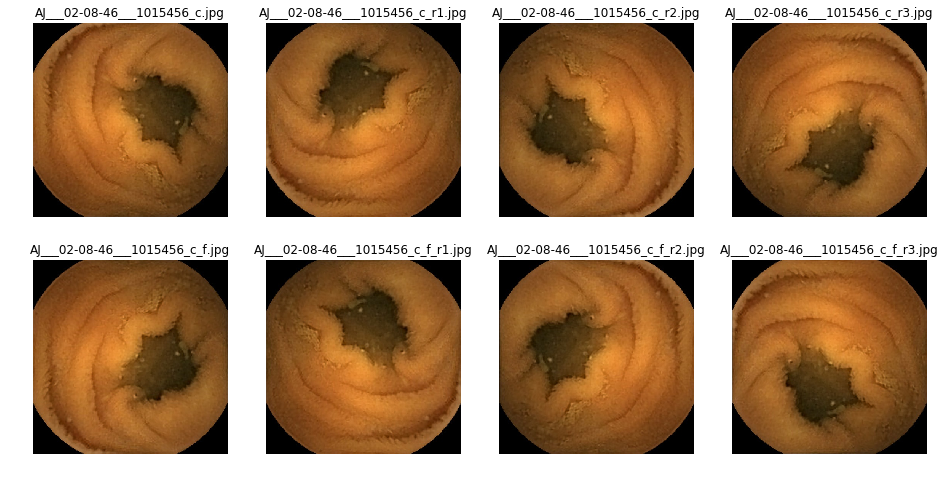

In [127]:

fig = plt.figure(figsize=(16, 8))
for i, s, img in zip(range(1,9), ss, ne):
    plt.subplot(2, 4, i)
    plt.title(s.split('/')[-1])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# 7. Go for it

In [24]:
neg_1_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190520 p3_2/p3_2'
neg_2_dir = '/mnt/disk2/data/private_data/SMhospital/capsule/0 data/labeled/190814 negative/raw'
save_dir =  '/mnt/disk2/data/private_data/SMhospital/capsule/1 preprocessed/sm_diff'

ce_pre = ce_preprocessing(neg_1_dir, save_dir)

In [140]:
%%time
ce_pre.pre_aug_and_save(phase = 'train', cls = 'n', les = 'neg', filename = neg_1_diff_filename)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'h', les = 'redspot', filename = redspot_diff_filename)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'h', les = 'angio', filename = angio_diff_filename)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'h', les = 'active', filename = active_diff_filename)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'd', les = 'ero', filename = ero_diff_filename)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'd', les = 'ulcer', filename = ulcer_diff_filename)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'd', les = 'str', filename = str_diff_filename)

negative/negative |#################################################################################################### | 100.0% 
hemorrhagic/red_spot |#################################################################################################### | 100.0% 
hemorrhagic/angioectasia |#################################################################################################### | 100.0% 
hemorrhagic/active_bleeding |#################################################################################################### | 100.0% 
depressed/erosion |#################################################################################################### | 100.0% 
depressed/ulcer |#################################################################################################### | 100.0% 
depressed/stricture |#################################################################################################### | 100.0% 
CPU times: user 13min 44s, sys: 11.9 s, total: 13min 56s
Wall time: 2m

In [28]:
%%time
ce_pre = ce_preprocessing(neg_2_dir, save_dir)
ce_pre.pre_aug_and_save(phase = 'train', cls = 'n', les = 'neg', filename = neg_2_diff_filename)

negative/negative |#################################################################################################### | 100.0% 
CPU times: user 24min 21s, sys: 43.2 s, total: 25min 4s
Wall time: 4min 53s
